In [1]:
import pandas
import numpy as np
from random import randrange,sample,randint
from sklearn.linear_model import LinearRegression
from tqdm import tqdm
from scipy import linalg
from time import time
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
df = pandas.read_csv("maize_major_yield.csv")
df = df.drop_duplicates()
df

,year,jan rain,jan mean min temperature,jan mean max temperature,feb rain,feb mean min temperature,feb mean max temperature,mar rain,mar mean min temperature,mar mean max temperature,...,oct rain,oct mean min temperature,oct mean max temperature,nov rain,nov mean min temperature,nov mean max temperature,dec rain,dec mean min temperature,dec mean max temperature,yield
0,1983,3.0,-8.3,3.5,0.1,-6.8,3.6,1.6,1.3,13.1,...,0.9,8.0,19.3,1.1,0.5,11.9,7.4,-4.9,6.2,3.367
1,1983,0.0,23.0,32.5,114.0,22.5,31.0,5.0,22.4,31.3,...,4.0,18.2,27.7,0.0,20.8,29.4,39.0,21.4,30.0,0.564
2,1983,0.0,20.7,34.1,30.0,24.2,37.5,12.0,25.3,38.0,...,119.0,23.2,33.4,196.0,23.8,34.7,9.7,23.1,33.3,0.700
3,1983,285.6,22.4,31.4,126.2,22.1,31.4,200.4,23.2,31.7,...,115.9,22.4,34.9,369.6,22.6,34.1,192.1,22.2,31.8,1.112
4,1983,132.0,20.7,35.2,10.0,19.5,36.7,58.0,17.2,33.8,...,23.0,16.0,32.5,42.0,18.4,33.8,111.0,18.9,31.6,0.919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31739,2013,111.0,19.1,32.1,238.9,20.1,31.4,193.0,18.2,28.5,...,104.9,16.6,28.2,179.0,18.3,30.5,233.6,20.3,32.0,3.488
31740,2013,16.5,3.8,9.5,5.5,8.1,19.0,43.0,11.7,22.3,...,72.7,11.8,19.9,21.4,10.7,16.5,45.9,3.7,10.0,6.358
31741,2013,19.4,-3.7,11.1,64.3,-2.7,11.4,3.8,1.6,19.1,...,4.5,6.1,23.0,13.0,0.1,14.5,8.1,-5.5,9.7,3.003
31742,2013,58.3,19.0,33.1,178.5,18.7,30.8,74.4,15.4,28.4,...,75.2,14.5,30.4,128.0,16.9,29.8,49.1,20.8,35.8,6.410


In [6]:
yield_column = df.loc[:, df.columns == 'yield'] 
del df['yield']
normalized_df = (df-df.mean())/df.std()
normalized_df = pandas.merge(normalized_df, yield_column, left_index=True, right_index=True)
normalized_df

,year,jan rain,jan mean min temperature,jan mean max temperature,feb rain,feb mean min temperature,feb mean max temperature,mar rain,mar mean min temperature,mar mean max temperature,...,oct rain,oct mean min temperature,oct mean max temperature,nov rain,nov mean min temperature,nov mean max temperature,dec rain,dec mean min temperature,dec mean max temperature,yield
0,-1.676738,-0.652496,-1.339024,-1.195930,-0.761221,-1.377653,-1.368490,-0.853904,-1.037771,-0.940000,...,-0.823299,-0.773952,-0.757317,-0.804317,-1.135765,-1.024822,-0.721974,-1.204718,-1.091691,3.367
1,-1.676738,-0.677042,1.078261,0.950844,0.410392,1.013334,0.788699,-0.817648,1.001357,0.749112,...,-0.789561,0.520963,0.264229,-0.815567,0.914250,0.622650,-0.422923,0.969898,0.766217,0.564
2,-1.676738,-0.677042,0.900633,1.069286,-0.453660,1.152060,1.300441,-0.743005,1.281617,1.370928,...,0.462018,1.155725,0.957421,1.188976,1.217208,1.121598,-0.700207,1.110462,1.023826,0.700
3,-1.676738,1.659735,1.031923,0.869414,0.535885,0.980693,0.820191,1.265972,1.078670,0.786236,...,0.428280,1.054163,1.139840,2.964428,1.096025,1.065113,1.025958,1.036046,0.906731,1.112
4,-1.676738,0.402981,0.900633,1.150716,-0.659386,0.768523,1.237457,-0.252490,0.498823,0.981133,...,-0.582778,0.241668,0.847970,-0.386022,0.671884,1.036871,0.258458,0.763185,0.891118,0.919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31739,1.676745,0.231159,0.777066,0.921233,1.695154,0.817485,0.820191,1.187063,0.595465,0.489249,...,0.308563,0.317839,0.325036,1.015112,0.661785,0.726205,1.418698,0.878944,0.922344,3.488
31740,1.676745,-0.542039,-0.404546,-0.751770,-0.705675,-0.161758,-0.156055,-0.412441,-0.032703,-0.086163,...,-0.041879,-0.291532,-0.684349,-0.596703,-0.105708,-0.591772,-0.357624,-0.493627,-0.795050,6.358
31741,1.676745,-0.518311,-0.983768,-0.633327,-0.100839,-1.043078,-0.754400,-0.830445,-1.008778,-0.383150,...,-0.784119,-1.015161,-0.307350,-0.682612,-1.176159,-0.780055,-0.715349,-1.254329,-0.818469,3.003
31742,1.676745,-0.200032,0.769343,0.995260,1.073860,0.703240,0.772953,-0.077611,0.324869,0.479968,...,-0.014670,0.051239,0.592583,0.493522,0.520405,0.660306,-0.327340,0.920287,1.218985,6.410


In [7]:
data = np.array(normalized_df)
np.random.seed(0)
shuffle = np.random.permutation(len(data))
split = int(len(df)*0.6)

In [9]:
def mse(y_pred,y_test):
    sum_squared_error = np.sum(np.square(y_test - y_pred))
    m_s_e = sum_squared_error/len(y_pred)
    
    return m_s_e


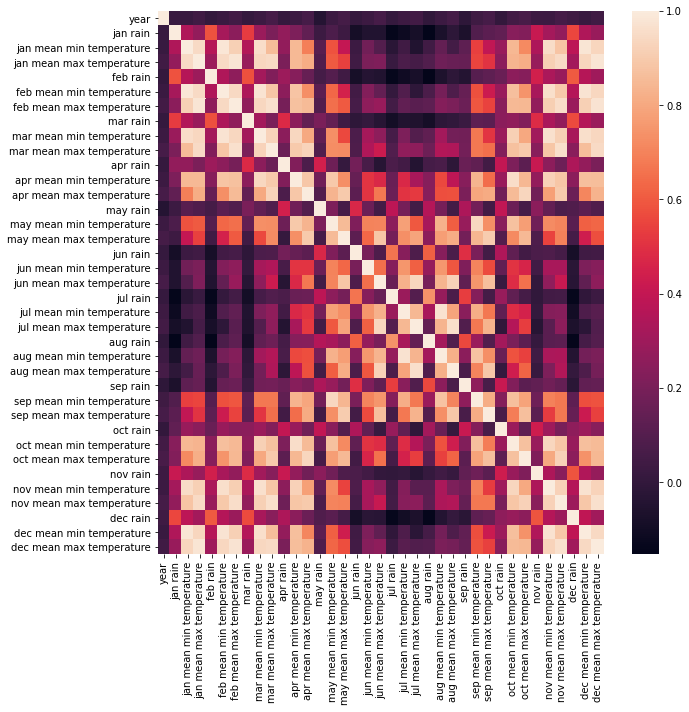

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())


In [11]:
df.describe()

,year,jan rain,jan mean min temperature,jan mean max temperature,feb rain,feb mean min temperature,feb mean max temperature,mar rain,mar mean min temperature,mar mean max temperature,...,sep mean max temperature,oct rain,oct mean min temperature,oct mean max temperature,nov rain,nov mean min temperature,nov mean max temperature,dec rain,dec mean min temperature,dec mean max temperature
count,31674.000000,31674.000000,31674.000000,31674.000000,31674.000000,31674.000000,31674.000000,31674.000000,31674.000000,31674.000000,...,31674.000000,31674.000000,31674.000000,31674.000000,31674.000000,31674.000000,31674.000000,31674.000000,31674.000000,31674.000000
mean,1997.999968,82.747803,9.038233,19.655389,74.103170,10.082244,20.982171,81.678323,12.038394,23.228396,...,27.304070,76.547973,14.096391,25.527287,79.744418,11.746761,22.786004,83.689322,9.669966,20.184675
std,8.945922,122.219603,12.948412,13.508647,97.216446,12.254353,12.701717,93.779082,10.347560,10.774892,...,6.987415,91.883945,7.876967,8.222832,97.777926,9.902367,10.622339,105.667755,12.094092,12.810109
min,1983.000000,0.000000,-41.200000,-23.800000,0.000000,-38.100000,-18.800000,0.000000,-34.400000,-11.300000,...,-4.900000,0.000000,-20.700000,-2.500000,0.000000,-30.900000,-10.200000,0.000000,-39.200000,-20.100000
25%,1990.000000,5.700000,-0.500000,7.400000,7.100000,0.400000,9.600000,13.300000,3.100000,14.400000,...,24.400000,12.700000,8.200000,20.300000,11.000000,3.500000,14.400000,7.000000,0.200000,8.700000
50%,1998.000000,37.800000,14.200000,26.000000,38.100000,15.100000,26.400000,50.700000,15.800000,26.800000,...,28.700000,44.200000,15.850000,27.800000,47.200000,15.200000,27.100000,43.900000,14.500000,26.100000
75%,2006.000000,117.100000,19.800000,31.000000,106.900000,20.500000,31.300000,121.300000,21.000000,31.600000,...,31.700000,105.600000,20.700000,31.500000,111.100000,19.900000,31.200000,121.175000,19.700000,30.900000
max,2013.000000,3476.000000,32.400000,40.200000,1009.000000,32.900000,46.500000,1102.400000,85.200000,42.000000,...,44.700000,933.500000,85.600000,52.800000,1594.000000,32.400000,40.200000,1381.900000,31.400000,39.900000


## Multivariate Linear Regression

In [12]:
x_linear= np.ones(38*len(data)).reshape(len(data),38)
y_linear= np.ones(len(data)).reshape(len(data),1)


In [13]:
for i in range(len(data)):
    x_linear[i][:-1] = data[i][:-1]
    y_linear[i] = data[i][-1]
    

In [14]:
x_linear = x_linear[shuffle]
y_linear = y_linear[shuffle]
x_train_linear= x_linear[:split]
y_train_linear = y_linear[:split]

x_test_linear = x_linear[split:]
y_test_linear = y_linear[split:]

In [15]:
def linear_regression_fit(x_train,y_train):
    
    
    x_dash_train = np.transpose(x_train)
    
    w = np.linalg.inv(x_dash_train @ x_train) @ x_dash_train @ y_train 
    
    return w

In [16]:
def linear_regression_predict(x_test,w_star):
    y_pred=  x_test @ w_star
    
    return y_pred

In [17]:
start =  time()
w_star = linear_regression_fit(x_train_linear,y_train_linear)
end = time()
print('Time taken:',end-start,'Seconds')

Time taken: 0.009006500244140625 Seconds


In [18]:
start = time()
y_pred = linear_regression_predict(x_test_linear,w_star)
end = time()
print('Time taken:',end-start,'Seconds')

Time taken: 0.0 Seconds


In [19]:
print("The mean squared error for the Linear Regression is {}".format(mse(y_pred,y_test_linear)))

The mean squared error for the Linear Regression is 9.000492682068865


### Regression Tree

In [21]:
train_data_forest = normalized_df.iloc[:split,:]
test_data_forest = normalized_df.iloc[split:,:]
x_test_forest = test_data_forest.iloc[:,:-1].to_numpy()
y_test_forest = test_data_forest.iloc[:,-1].to_numpy()

In [22]:
def find_split(x,y):
    
    best = {'weighting_combination' : np.inf}
    
    for i in range(x.shape[1]):
        t_i = len(x[:,i]) #total indices
        for split in np.unique(x[:,i]):
            
            left_indices = np.where(x[:,i] <= split)[0]
            left_node_var = np.var(y[left_indices])
            
            t_l = len(left_indices)#total left indices
            
            
            right_indices = np.where(x[:,i] > split)[0]
            right_node_var = np.var(y[right_indices])
            
            t_r = len(right_indices)# total right indices


            weighting_combination = (t_l/ t_i) * left_node_var +(t_r/t_i) *right_node_var


            if weighting_combination < best['weighting_combination']:
                
                best = {'feature' : i,
                        'split' : split,
                        'weighting_combination' : weighting_combination, 
                        'left_indices' : left_indices,
                        'right_indices' : right_indices }


    return best

    

In [23]:
def build_tree(x, y, mean ,max_depth = np.inf,min_instances = 50):
    # Check if either of the stopping conditions have been reached. If so generate a leaf node...
    
    
    if max_depth==1 :
        # Generate a leaf node...
#         b= len(y)
#         c += b
      
        value = np.mean(y)
        return {'leaf' : True, 'class' : value}
    
    else:
        
        move = find_split(x, y)
        if 'left_indices' not in move or 'right_indices' not in move:
            
            return {'leaf' : True, 'class' : mean }
        
        elif len(move['left_indices'])<=min_instances or len(move['right_indices']) <=min_instances :

            value = np.mean(y)
            return {'leaf' : True, 'class' : value}


        
        left = build_tree(x[move['left_indices'],:], y[move['left_indices']],mean, max_depth - 1,min_instances = 50)
        right = build_tree(x[move['right_indices'],:], y[move['right_indices']],mean, max_depth - 1,min_instances = 50)
        
        return {'leaf' : False,
                'feature' : move['feature'],
                'split' : move['split'],
                'weighting_combination' : move['weighting_combination'],
                'left' : left,
                'right' : right}

In [24]:
def predict(tree, samples):
    """Predicts class for every entry of a data matrix."""
    ret = np.empty(samples.shape[0], dtype=float)
    ret.fill(-1)
    indices = np.arange(samples.shape[0])
    
    def tranverse(node, indices):
        nonlocal samples
        nonlocal ret
        
        if node['leaf']:
            ret[indices] = node['class']
        
        else:
            
            going_left = samples[indices, node['feature']] <= node['split']
            
            left_indices = indices[going_left]
            right_indices = indices[np.logical_not(going_left)]
            
            if left_indices.shape[0] > 0:
                tranverse(node['left'], left_indices)
                
            if right_indices.shape[0] > 0:
                tranverse(node['right'], right_indices)
    
    tranverse(tree, indices)
    return ret

In [25]:
def bootstrapping(dataframe):
    data_range = len(dataframe)
    a= []
    for i in range(data_range):
        b= randrange(0,data_range)
        a.append(b)
    bootstrapped_df = dataframe.iloc[a,:]
    return bootstrapped_df
    

In [26]:
def random_subspace(dataframe):
    number_of_features = len(dataframe.columns) 
    if number_of_features == 1:
        number_random_features = 1
    else:
        number_random_features  = int(number_of_features**0.5)
    
    a= sample(range(0,number_of_features-1),number_random_features)# Generates a list of unique random numbers for 0 up to number of features -1
    a.append(-1)
    random_dataframe = dataframe.iloc[:,a]
    return random_dataframe
    

In [27]:
def build_forest(train_data,max_depth =20 ,min_instances = 5,no_of_trees=15):
    forest = []
    for i in range(no_of_trees):
        train_data_tree = bootstrapping(train_data)
        train_data_tree = random_subspace(train_data_tree)
        x_train = train_data_tree.iloc[:,:-1].to_numpy()
        y_train = train_data_tree.iloc[:,-1].to_numpy()
        y_train_mean = y_train.mean()
        tree = build_tree(x_train,y_train,y_train_mean,max_depth,min_instances)
        forest.append(tree)
    return forest
    

In [28]:
def predict_forest(forest, test_data):
    
    
    predictions =[]
    for tree in forest:
        y_pred_tree= predict(tree,test_data)
        predictions.append(y_pred_tree)

    total = 0
    for array in predictions:
        total += array
    y_pred_forest = total/(len(forest))
    
    return y_pred_forest
        
    
    

In [29]:
start = time()
forest = build_forest(train_data_forest)
end = time()
print('Time taken:',end-start,'Seconds')

C:\Users\Andreas Kafkalias\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Andreas Kafkalias\anaconda3\lib\site-packages\numpy\core\_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\Andreas Kafkalias\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Time taken: 100.52080392837524 Seconds


In [30]:
start = time()
y_pred_forest = predict_forest(forest, x_test_forest)
end = time()
print('Time taken:',end-start,'Seconds')

Time taken: 0.017014741897583008 Seconds


In [31]:
print("The mean squared error for the Random Regression Forest is {}".format(mse(y_pred_forest,y_test_forest)))

The mean squared error for the Random Regression Forest is 17.51263005063576


# Gaussian Process


In [32]:
split1 = int(split/4)
split2 = split1 *2
split3 = split1 *3 
split3

14253

In [33]:

x_gaussian = normalized_df.iloc[:,:-1].to_numpy()
y_gaussian = normalized_df.iloc[:,-1].to_numpy()

x_gaussian = x_gaussian[shuffle]
y_gaussian = y_gaussian[shuffle]


x_train_gaussian1 = x_gaussian[:split1]
y_train_gaussian1 = y_gaussian[:split1]

x_train_gaussian2 = x_gaussian[split1:split2]
y_train_gaussian2 = y_gaussian[split1:split2]

x_train_gaussian3 = x_gaussian[split2:split3]
y_train_gaussian3 = y_gaussian[split2:split3]

x_train_gaussian4 = x_gaussian[split3:split]
y_train_gaussian4 = y_gaussian[split3:split]





x_train_gaussian= x_gaussian[:split]
y_train_gaussian = y_gaussian[:split]


x_test_gaussian = x_gaussian[split:]
y_test_gaussian = y_gaussian[split:]

In [34]:
x_test_gaussian.shape

(12670, 37)

In [35]:
def euclidean_distance(x1,x2):
    
    euclidean_distance = -2 * x1 @ x2.T + np.sum(x1**2,axis=1).reshape(x1.shape[0],1) + np.sum(x2**2,axis=1)
    return euclidean_distance

In [36]:
def kernel_func(x1,x2,s,l):
    euclidean_distance = -2 * x1 @ x2.T + np.sum(x1**2,axis=1).reshape(x1.shape[0],1) + np.sum(x2**2,axis=1)
    kernel = s * np.exp(-euclidean_distance / l)
    return kernel

In [37]:
def optimize_GP(xtrain,ytrain,a=0.001,num_iter=100):
    
    np.random.seed(0)
    n= len(xtrain)
    log_s, log_l ,log_sigma = np.random.normal(), np.random.normal(), np.random.normal()
    grad_s ,grad_l, grad_sigma = np.zeros(3,dtype=int)
    
    cost_function = np.zeros(num_iter)
    
#     transf_function = LinearRegression()
#     f_x = transf_function.fit(xtrain,ytrain)
# ytrain = (ytrain - f_x.predict(xtrain))
    x_linear= np.ones(38*n).reshape(n,38)
    y_linear= np.ones(n).reshape(n,1)
    for i in range(n):
        x_linear[i][:-1] = data[i][:-1]
        y_linear[i] = data[i][-1]
    
    w_star = linear_regression_fit(x_linear,y_linear)
    y_pred = linear_regression_predict(x_linear,w_star)
    y_pred = y_pred.reshape(n,)
    
    ytrain = (ytrain - y_pred)
    sd = np.std(ytrain)
    ytrain = ytrain / sd
    
    identity_mat = np.eye(xtrain.shape[0])
    
    # Implementing gradient descent
    for i in range(num_iter):
        
        kernel = kernel_func(xtrain,xtrain,np.exp(log_s),np.exp(log_l))
        R = kernel + np.exp(log_sigma) * identity_mat
        
        L = np.linalg.cholesky(R)
        R_inv = linalg.cho_solve((L,True), identity_mat)
        
        term_sigma = np.exp(log_sigma) * identity_mat
        grad_sigma = -0.5 * np.trace(R_inv @ term_sigma) + 0.5 * np.trace(ytrain.reshape(1,-1) @ R_inv @ term_sigma @ R_inv @ ytrain.reshape(-1,1))# - sigma / 2
        
        grad_s = -0.5 * np.trace(R_inv @ kernel) + 0.5 * np.trace(ytrain.reshape(1,-1) @ R_inv @ kernel @ R_inv @ ytrain.reshape(-1,1))# - s /2 
        
        term_l = euclidean_distance(xtrain,xtrain) / np.exp(log_l) * kernel
        grad_l = -0.5 * np.trace(R_inv @ term_l) + 0.5 * np.trace(ytrain.reshape(1,-1) @ R_inv @ term_l @ R_inv @ ytrain.reshape(-1,1))# - l / 2
        cost_function[i] = -(n/2) * np.log(2 * np.pi) - 0.5 * np.prod(np.linalg.slogdet(R)) - 0.5 * np.trace(ytrain.reshape(1,-1) @ R_inv @ ytrain.reshape(-1,1))
        print("iteration {}".format(i))
        print('l :{}  s:{} sigma:{}  cost:{}'.format(np.exp(log_l), np.exp(log_s), np.exp(log_sigma), cost_function[i]))
        
        if np.isclose(cost_function[i],cost_function[i-1]):
            print("Answer converged in {} iterations".format(i))
            return np.exp(log_l), np.exp(log_s), np.exp(log_sigma)
        
        log_s +=  a * grad_s
        log_l +=  a * grad_l
        log_sigma +=  a * grad_sigma
        
    return np.exp(log_l), np.exp(log_s), np.exp(log_sigma)
        

In [38]:
def gaussian_process_fit(xtrain,ytrain,xtest,l,s,sigma):
    kstardot = kernel_func(xtest,xtrain,s,l)
    k = kernel_func(xtrain,xtrain,s,l)
    kstarstar = kernel_func(xtest,xtest,s,l)
    kdotstar = kernel_func(xtrain,xtest,s,l)
    a = np.linalg.inv(k + sigma* np.eye(len(k)))
    mu_star =  kstardot @ a @ytrain
    var_star = kstarstar - kstardot@ a @ kdotstar + sigma
    
    
    
    return mu_star,var_star

In [39]:
def gaussian_process_predict(mu_star,var_star):
    np.random.seed(0)
    y_pred = np.random.multivariate_normal(mu_star,var_star)
    
    return y_pred 

In [40]:
start = time()

l1,s1,sigma1 = optimize_GP(x_train_gaussian1,y_train_gaussian1)
l2,s2,sigma2 = optimize_GP(x_train_gaussian2,y_train_gaussian2)
l3,s3,sigma3 = optimize_GP(x_train_gaussian3,y_train_gaussian3)
l4,s4,sigma4 = optimize_GP(x_train_gaussian4,y_train_gaussian4)
l = (l1 + l2 + l3 +l4)/4
s = (s1 + s2 + s3 +s4)/4
sigma = (sigma1 +sigma2 +sigma3 +sigma4)/4
mu_star,var_star = gaussian_process_fit(x_train_gaussian,y_train_gaussian,x_test_gaussian,l,s,sigma)

end = time()
print('Time taken:',end-start,'Seconds')

iteration 0
l :1.4920592434019648  s:5.836039190663969 sigma:2.661095776728801  cost:-9251.056973660254
iteration 1
l :1.9253229516716817  s:1.8698462116604588 sigma:1.0096704271312487  cost:-7140.4848243655015
iteration 2
l :2.977383194914623  s:0.8289587247995002 sigma:0.4379462976346912  cost:-5838.363250588863
iteration 3
l :5.369696854381317  s:0.5532454614233467 sigma:0.28541267515318813  cost:-5362.048578701523
iteration 4
l :7.424167342880778  s:0.5117227050941946 sigma:0.3191646360093606  cost:-5261.493679543154
iteration 5
l :9.075283981196867  s:0.48860090123171596 sigma:0.3489265552596803  cost:-5219.628368720234
iteration 6
l :10.469274771864185  s:0.4729570412617961 sigma:0.361825347352082  cost:-5200.373769764462
iteration 7
l :11.547057972872636  s:0.46521956117507424 sigma:0.37478037618863197  cost:-5190.874064422607
iteration 8
l :12.432671998903492  s:0.4604915175670595 sigma:0.3801374275459097  cost:-5185.893426126297
iteration 9
l :13.111429862087931  s:0.458999317

iteration 15
l :11.971762490665622  s:0.4384280985268623 sigma:0.4349708941383274  cost:-5426.751231476852
iteration 16
l :12.152419908163527  s:0.4376214767379368 sigma:0.43668598100407163  cost:-5426.52834832306
iteration 17
l :12.307108131899453  s:0.4370769731706175 sigma:0.43789496648277626  cost:-5426.373053798774
iteration 18
l :12.437523413502419  s:0.436784699077718 sigma:0.4390504557558203  cost:-5426.26411521197
iteration 19
l :12.549301884627528  s:0.4366397931133949 sigma:0.4398608839822941  cost:-5426.187185492947
iteration 20
l :12.643658066817238  s:0.43664146937556414 sigma:0.4406474474500648  cost:-5426.132510350799
iteration 21
l :12.72466226252945  s:0.43672053481511114 sigma:0.4411944764642614  cost:-5426.093402609445
Answer converged in 21 iterations
Time taken: 832.8904764652252 Seconds


In [41]:
start = time()
y_pred = gaussian_process_predict(mu_star,var_star)
end = time()
print('Time taken:',end-start,'Seconds')

Time taken: 642.3411641120911 Seconds


In [42]:
print("The mean squared error for the Gaussian Process is {}".format(mse(y_pred,y_test_gaussian)))

The mean squared error for the Gaussian Process is 5.884176819453426


# Knn


In [43]:
data = np.array(normalized_df)
x= np.ones(37*len(data)).reshape(len(data),37)
y= np.ones(len(data))
for i in range(len(data)):
    x[i] = data[i][:-1]
    y[i] = data[i][-1]

In [44]:
x_knn = normalized_df.iloc[:,:-1].to_numpy()
y_knn = normalized_df.iloc[:,-1].to_numpy()
x_knn = x_knn[shuffle]
y_knn = y_knn[shuffle]
x_train_knn= x_knn[:split]
y_train_knn = y_knn[:split]

x_test_knn = x_knn[split:]
y_test_knn = y_knn[split:]

In [45]:
def knn_predictions(xTrain,yTrain,xTest,k=3):
   
    indices, distances = knn(xTrain,xTest,k)
    yTrain = yTrain.flatten()
    rows, columns = indices.shape
    predictions = list()
    for j in range(columns):
        temp = list()
        for i in range(rows):
            cell = indices[i][j]
            temp.append(yTrain[cell])
        predictions.append(max(temp,key=temp.count)) #this is the key function, brings the mode value
    predictions=np.array(predictions)
    return predictions

In [46]:
def knn(xTrain, xTest, k):
 
    #the following formula calculates the Euclidean distances.
    distances = -2 * xTrain@xTest.T + np.sum(xTest**2,axis=1) + np.sum(xTrain**2,axis=1)[:, np.newaxis]

    distances[distances < 0] = 0
    
    distances = distances**.5
    indices = np.argsort(distances, 0) #get indices of sorted items
    distances = np.sort(distances,0) #distances sorted in axis 0
    #returning the top-k closest distances.
    return indices[0:k, : ], distances[0:k, : ]

In [47]:
start= time()
y_pred_knn = knn_predictions(x_train_knn,y_train_knn,x_test_knn,k=3)
end = time()
print('Time taken:',end-start,'Seconds')

    

Time taken: 39.97437071800232 Seconds


In [48]:
predictions = []
for i in range(1,11):
    y_pred_knn = knn_predictions(x_train_knn,y_train_knn,x_test_knn,k=i)
    if i == 1:
        print("For {} neighbor the mse is {}".format(i,mse(y_pred_knn,y_test_knn)))
    else:
        print("For {} neighbors the mse is {}".format(i,mse(y_pred_knn,y_test_knn)))
    predictions.append(mse(y_pred_knn,y_test_knn))

For 1 neighbor the mse is 5.863849813812155
For 2 neighbors the mse is 5.863849813812155
For 3 neighbors the mse is 5.863843924625098
For 4 neighbors the mse is 5.86343745264404
For 5 neighbors the mse is 5.867118805209156
For 6 neighbors the mse is 5.864019250276243
For 7 neighbors the mse is 5.866228758011049
For 8 neighbors the mse is 5.867667735595896
For 9 neighbors the mse is 5.868464187371744
For 10 neighbors the mse is 5.872532885398579


Text(0, 0.5, 'MSE')

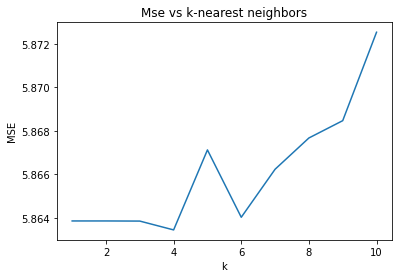

In [49]:
plt.plot([i for i in range(1,11)],predictions)
plt.title('Mse vs k-nearest neighbors')
plt.xlabel('k')
plt.ylabel('MSE')
        

## Toyproblem

In [50]:
a= np.random.normal(0,1,2000).reshape(2000,1)
b = np.ones((2000,2))

for i in range(2000):
    b[i][0] = a[i]
    b[i][1] = a[i]*2  + np.random.normal()

In [51]:
df = pandas.DataFrame(b, columns = ['X','Y'])
df

,X,Y
0,-0.400618,1.785130
1,-0.396121,-0.562545
2,1.591340,3.674854
3,-0.585017,-1.385778
4,0.939336,3.649505
...,...,...
1995,1.070395,3.097298
1996,0.012294,-1.567602
1997,1.741890,2.592389
1998,-0.856584,0.623268


In [52]:
yield_column = df.loc[:, df.columns == 'Y'] 
del df['Y']
normalized_df = (df-df.mean())/df.std()
normalized_df = pandas.merge(normalized_df, yield_column, left_index=True, right_index=True)
normalized_df

,X,Y
0,-0.446095,1.785130
1,-0.441489,-0.562545
2,1.593818,3.674854
3,-0.634932,-1.385778
4,0.926117,3.649505
...,...,...
1995,1.060331,3.097298
1996,-0.023243,-1.567602
1997,1.747991,2.592389
1998,-0.913037,0.623268


Text(0.5, 1.0, 'Toy problem data')

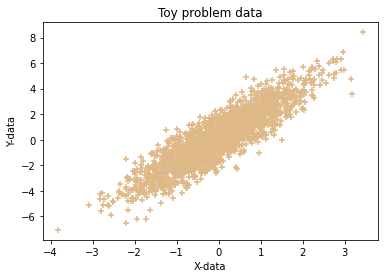

In [53]:
plt.scatter('X','Y',data =normalized_df, marker = '+', color = 'burlywood')
plt.ylabel('Y-data')
plt.xlabel('X-data')
plt.title('Toy problem data')

In [54]:
split = int(len(df)*0.6)
data = np.array(normalized_df)
np.random.seed(0)
shuffle = np.random.permutation(len(data))


## Linear Regression toy problem

In [55]:
x_linear= np.ones((len(data),1))
y_linear= np.ones((len(data),1))

for i in range(len(data)):
    x_linear[i] = data[i][0]
    y_linear[i] = data[i][-1]
    
x_linear = x_linear[shuffle]
y_linear = y_linear[shuffle]
x_train_linear= x_linear[:split]
y_train_linear = y_linear[:split]

x_test_linear = x_linear[split:]
y_test_linear = y_linear[split:]

In [56]:
w_star = linear_regression_fit(x_train_linear,y_train_linear)
y_pred_linear = linear_regression_predict(x_test_linear,w_star)
print("The mean squared error for the Linear Regression toy problem is {}".format(mse(y_pred_linear,y_test_linear)))

The mean squared error for the Linear Regression toy problem is 0.9091484748613322


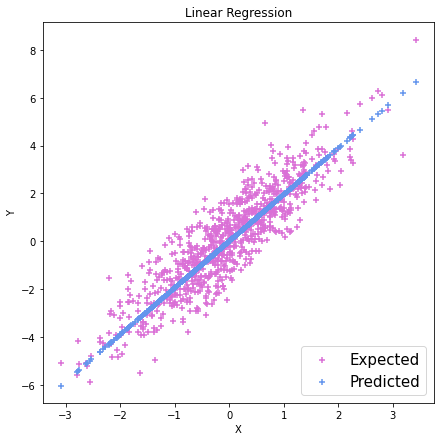

In [57]:
plt.figure(figsize=(7,7))
plt.scatter(x_test_linear,y_test_linear,color = 'orchid',marker = '+')
plt.scatter(x_test_linear,y_pred_linear,color = 'cornflowerblue',marker = '+')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend(["Expected", "Predicted"], loc ="lower right",prop={'size': 15} )

## Regression Forest Toy Problem 

In [58]:
train_data_forest = normalized_df.iloc[:split,:]
test_data_forest = normalized_df.iloc[split:,:]
x_test_forest = test_data_forest.iloc[:,:-1].to_numpy()
y_test_forest = test_data_forest.iloc[:,-1].to_numpy()
train_data_forest

,X,Y
0,-0.446095,1.785130
1,-0.441489,-0.562545
2,1.593818,3.674854
3,-0.634932,-1.385778
4,0.926117,3.649505
...,...,...
1195,-0.106632,-0.108239
1196,0.006374,-0.676068
1197,-0.160222,1.962142
1198,0.860887,2.516006


In [59]:
forest = build_forest(train_data_forest)
y_pred_forest = predict_forest(forest, x_test_forest)
print("The mean squared error for the Random Regression Forest toy problem is {}".format(mse(y_pred_forest,y_test_forest)))

C:\Users\Andreas Kafkalias\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Andreas Kafkalias\anaconda3\lib\site-packages\numpy\core\_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\Andreas Kafkalias\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


The mean squared error for the Random Regression Forest toy problem is 1.0282858216267743


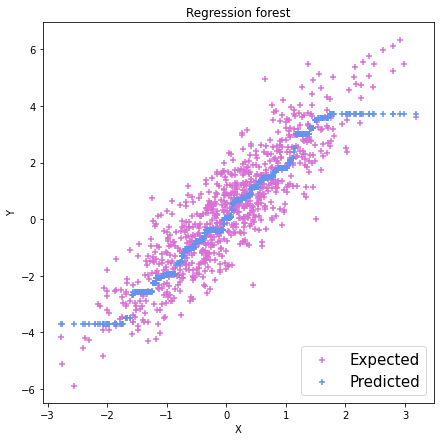

In [60]:
plt.figure(figsize=(7,7))
plt.scatter(x_test_forest,y_test_forest,color = 'orchid',marker = '+')
plt.scatter(x_test_forest,y_pred_forest,color = 'cornflowerblue',marker = '+')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression forest')
plt.legend(["Expected", "Predicted"], loc ="lower right",prop={'size': 15} )

## Gaussian

In [61]:
x_gaussian = normalized_df.iloc[:,:-1].to_numpy()
y_gaussian = normalized_df.iloc[:,-1].to_numpy()

x_gaussian = x_gaussian[shuffle]
y_gaussian = y_gaussian[shuffle]

x_train_gaussian= x_gaussian[:split]
y_train_gaussian = y_gaussian[:split]

x_test_gaussian = x_gaussian[split:]
y_test_gaussian = y_gaussian[split:]


y_pred_linear_gaussian = linear_regression_predict(x_train_linear,w_star)

In [63]:
def optimize_GP(xtrain,ytrain,a=0.001,num_iter=100):
    
    np.random.seed(0)
    n= len(xtrain)
    log_s, log_l ,log_sigma = np.random.normal(), np.random.normal(), np.random.normal()
    grad_s ,grad_l, grad_sigma = np.zeros(3,dtype=int)
    
    cost_function = np.zeros(num_iter)
    

    ytrain = ytrain.reshape(len(ytrain),1)
    ytrain = (ytrain - y_pred_linear_gaussian)
    
    sd = np.std(ytrain)
    ytrain = ytrain / sd
    
    identity_mat = np.eye(xtrain.shape[0])
    
    # Implementing gradient descent
    for i in range(num_iter):
        
        kernel = kernel_func(xtrain,xtrain,np.exp(log_s),np.exp(log_l))
        R = kernel + np.exp(log_sigma) * identity_mat
        
        L = np.linalg.cholesky(R)
        R_inv = linalg.cho_solve((L,True), identity_mat)
        
        term_sigma = np.exp(log_sigma) * identity_mat
        grad_sigma = -0.5 * np.trace(R_inv @ term_sigma) + 0.5 * np.trace(ytrain.reshape(1,-1) @ R_inv @ term_sigma @ R_inv @ ytrain.reshape(-1,1))# - sigma / 2
        
        grad_s = -0.5 * np.trace(R_inv @ kernel) + 0.5 * np.trace(ytrain.reshape(1,-1) @ R_inv @ kernel @ R_inv @ ytrain.reshape(-1,1))# - s /2 
        
        term_l = euclidean_distance(xtrain,xtrain) / np.exp(log_l) * kernel
        grad_l = -0.5 * np.trace(R_inv @ term_l) + 0.5 * np.trace(ytrain.reshape(1,-1) @ R_inv @ term_l @ R_inv @ ytrain.reshape(-1,1))# - l / 2
        cost_function[i] = -(n/2) * np.log(2 * np.pi) - 0.5 * np.prod(np.linalg.slogdet(R)) - 0.5 * np.trace(ytrain.reshape(1,-1) @ R_inv @ ytrain.reshape(-1,1))
        print("iteration {}".format(i))
        print('l :{}  s:{} sigma:{}  cost:{}'.format(np.exp(log_l), np.exp(log_s), np.exp(log_sigma), cost_function[i]))
        
        if np.isclose(cost_function[i],cost_function[i-1]):
            print("Answer converged in {} iterations".format(i))
            return np.exp(log_l), np.exp(log_s), np.exp(log_sigma)
        
        log_s +=  a * grad_s
        log_l +=  a * grad_l
        log_sigma +=  a * grad_sigma
        
    return np.exp(log_l), np.exp(log_s), np.exp(log_sigma)
        

In [64]:
l,s,sigma = optimize_GP(x_train_gaussian,y_train_gaussian)

iteration 0
l :1.4920592434019648  s:5.836039190663969 sigma:2.661095776728801  cost:-1933.5850601792777
iteration 1
l :1.5007664080549314  s:5.810595167072076 sigma:1.8367211500051763  cost:-1813.6280062265012
iteration 2
l :1.5098509390586383  s:5.784791112961286 sigma:1.4023321423453419  cost:-1753.7479552406403
iteration 3
l :1.5190368978336526  s:5.758971766092589 sigma:1.184248887020895  cost:-1731.5660666864098
iteration 4
l :1.5281993888286503  s:5.733305585789853 sigma:1.0817159823231444  cost:-1725.4416100353687
iteration 5
l :1.5373255659216782  s:5.707836142839233 sigma:1.0364557747254397  cost:-1724.0714030334334
iteration 6
l :1.5464386380879966  s:5.6825599477515745 sigma:1.0173320777688528  cost:-1723.770664822882
iteration 7
l :1.5555596179100653  s:5.657466484336111 sigma:1.0094425785529442  cost:-1723.6738316526887
iteration 8
l :1.5647010996832944  s:5.632547864330885 sigma:1.0062261797416707  cost:-1723.612925378929
iteration 9
l :1.5738700959868597  s:5.6077988322

iteration 78
l :2.3383641268434485  s:4.22182736909806 sigma:1.0042418207749049  cost:-1720.118190467017
iteration 79
l :2.351144316702521  s:4.205777944963294 sigma:1.0042368579361085  cost:-1720.0740432557463
iteration 80
l :2.3639506293103056  s:4.189828900475759 sigma:1.0042318880407837  cost:-1720.0301689493645
iteration 81
l :2.3767823841713316  s:4.17397939270025 sigma:1.004226921717147  cost:-1719.9865678851847
iteration 82
l :2.389638958526064  s:4.158228568364267 sigma:1.0042219690043517  cost:-1719.9432400471292
iteration 83
l :2.4025197876800513  s:4.142575564962838 sigma:1.004217039341032  cost:-1719.9001850786688
iteration 84
l :2.4154243651011633  s:4.12701951187363 sigma:1.0042121415573892  cost:-1719.8574022965818
iteration 85
l :2.4283522422961643  s:4.1115595314758355 sigma:1.0042072838706269  cost:-1719.8148907053987
iteration 86
l :2.4413030284784742  s:4.096194740266686 sigma:1.0042024738835238  cost:-1719.7726490124098
iteration 87
l :2.454276390039383  s:4.08092

In [65]:
mu_star, var_star = gaussian_process_fit(x_train_gaussian,y_train_gaussian,x_test_gaussian,l,s,sigma)
y_pred_gaussian = gaussian_process_predict(mu_star,var_star)
print("The mean squared error for the Gaussian Process toy problem is {}".format(mse(y_pred_gaussian,y_test_gaussian)))

The mean squared error for the Gaussian Process toy problem is 4.0705952760880715


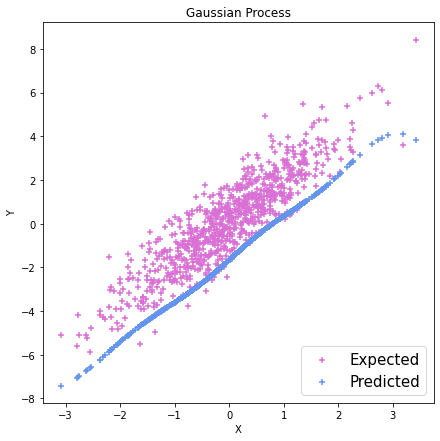

In [66]:
plt.figure(figsize=(7,7))
plt.scatter(x_test_gaussian,y_test_gaussian,color = 'orchid',marker = '+')
plt.scatter(x_test_gaussian,y_pred_gaussian,color = 'cornflowerblue',marker = '+')
plt.title('Gaussian Process')
plt.xlabel('X')
plt.ylabel('Y')

plt.legend(["Expected", "Predicted"], loc ="lower right",prop={'size': 15} )

## Knn Toy problem

In [67]:
x_knn = normalized_df.iloc[:,:-1].to_numpy()
y_knn = normalized_df.iloc[:,-1].to_numpy()
x_knn = x_knn[shuffle]
y_knn = y_knn[shuffle]
x_train_knn= x_knn[:split]
y_train_knn = y_knn[:split]

x_test_knn = x_knn[split:]
y_test_knn = y_knn[split:]

In [68]:

y_pred_knn = knn_predictions(x_train_knn,y_train_knn,x_test_knn,k=4)

print("The mean squared error for the Κnn toy problem is {}".format(mse(y_pred_knn,y_test_knn)))


The mean squared error for the Κnn toy problem is 1.8099643930714344


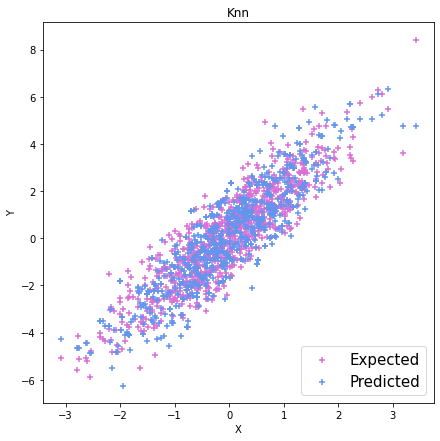

In [69]:
plt.figure(figsize=(7,7))
plt.scatter(x_test_knn,y_test_knn,color = 'orchid',marker = '+')
plt.scatter(x_test_knn,y_pred_knn,color = 'cornflowerblue',marker = '+')
plt.title('Knn')
plt.xlabel('X')
plt.ylabel('Y')

plt.legend(["Expected", "Predicted"], loc ="lower right",prop={'size': 15} )